<a href="https://colab.research.google.com/github/shivasrinivasaraopinnamaneni/info5731-fall2021/blob/main/In_class_exercise_03_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The third In-class-exercise (9/29/2021, 40 points in total)

The purpose of this exercise is to understand text representation.

Question 1 (10 points): Describe an interesting text classification or text mining task and explain what kind of features might be useful for you to build the machine learning model. List your features and explain why these features might be helpful. You need to list at least five different types of features.

In [35]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):
'''
Please write you answer here:

Text classification can be a very rich source of information, but due to its unstructured nature, extracting insights from it can be difficult and time-consuming.
Sorting text data is becoming easier because to developments in natural language processing and machine learning, 
both of which lie under the broad umbrella of artificial intelligence. It works by swiftly and cost-effectively analyzing and structuring text so that businesses may automate processes and uncover insights that lead to better decision-making.
I'm doing text categorization on tweet data in this exercise. The apple firm is the subject of the tweets dataset. Text analysis will be performed, and features will be extracted from the text data.

These are the following features are Locating the character length for each sentiment, Word count, Average chacter length per word, Special characters count ,Number Counts.

We also use these features in sentiment analysis.
'''

"\nPlease write you answer here:\n\nText classification can be a very rich source of information, but due to its unstructured nature, extracting insights from it can be difficult and time-consuming.\nSorting text data is becoming easier because to developments in natural language processing and machine learning, \nboth of which lie under the broad umbrella of artificial intelligence. It works by swiftly and cost-effectively analyzing and structuring text so that businesses may automate processes and uncover insights that lead to better decision-making.\nI'm doing text categorization on tweet data in this exercise. The apple firm is the subject of the tweets dataset. Text analysis will be performed, and features will be extracted from the text data.\n\nThese are the following features are Locating the character length for each sentiment, Word count, Average chacter length per word, Special characters count ,Number Counts.\n\nWe also use these features in sentiment analysis.\n"

Question 2 (20 points): Write python code to extract these features you discussed above. You can collect a few sample text data for the feature extraction. 

In [2]:
# You code here (Please add comments in the code):

#importing libraries and required modules
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
%matplotlib inline
warnings.filterwarnings("ignore", category=DeprecationWarning)
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')
stop = stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
#upload dataset file
from google.colab import files
uploaded = files.upload()
import io
data = pd.read_csv('apple-twitter-sentiment-texts.csv', error_bad_lines=False)

df = pd.read_csv('apple-twitter-sentiment-texts.csv')
print(df.shape)
df.head(5)

#label the datafile on avg
conditions = [
    (df['sentiment'] == -1), # -1 means -ve result
    (df['sentiment'] == 0), # 0 means neutral result
    (df['sentiment'] == 1), # 1 means +ve result
]

# creating a list of the values for each condtion
values = ['Negative', 'Neutral', 'Positive']

df['result'] = np.select(conditions, values)

df.head()

Saving apple-twitter-sentiment-texts.csv to apple-twitter-sentiment-texts (4).csv
(1630, 2)


,text,sentiment,result
0,Wow. Yall needa step it up @Apple RT @heynyla:...,-1,Negative
1,What Happened To Apple Inc? http://t.co/FJEX...,0,Neutral
2,Thank u @apple I can now compile all of the pi...,1,Positive
3,The oddly uplifting story of the Apple co-foun...,0,Neutral
4,@apple can i exchange my iphone for a differen...,0,Neutral


In [20]:
#count the -ve, +ve and neutral result and groupby on result
df.groupby('result')['text'].count()

result
Negative    686
Neutral     801
Positive    143
Name: text, dtype: int64

In [21]:
# counting each condtion result
df.groupby('result')['sentiment'].mean()

result
Negative   -1
Neutral     0
Positive    1
Name: sentiment, dtype: int64

In [22]:
df['character_cnt'] = df['text'].str.len()
print(df.groupby('result')['character_cnt'].mean())
print(df.head())

result
Negative    91.062682
Neutral     98.446941
Positive    98.475524
Name: character_cnt, dtype: float64
                                                text  ...  character_cnt
0  Wow. Yall needa step it up @Apple RT @heynyla:...  ...            105
1  What Happened To Apple Inc?   http://t.co/FJEX...  ...            101
2  Thank u @apple I can now compile all of the pi...  ...            108
3  The oddly uplifting story of the Apple co-foun...  ...            115
4  @apple can i exchange my iphone for a differen...  ...             77

[5 rows x 5 columns]


In [23]:
df['word_counts'] = df['text'].str.split().str.len()
print(df.groupby('result')['word_counts'].mean())
print(df.head())

result
Negative    15.787172
Neutral     13.377029
Positive    14.846154
Name: word_counts, dtype: float64
                                                text  ...  character_cnt
0  Wow. Yall needa step it up @Apple RT @heynyla:...  ...            105
1  What Happened To Apple Inc?   http://t.co/FJEX...  ...            101
2  Thank u @apple I can now compile all of the pi...  ...            108
3  The oddly uplifting story of the Apple co-foun...  ...            115
4  @apple can i exchange my iphone for a differen...  ...             77

[5 rows x 5 columns]


In [24]:
df['characters_per_word'] = df['character_cnt']/df['word_counts']
print(df.groupby('result')['characters_per_word'].mean())
print(df.head())

result
Negative    5.884512
Neutral     7.544972
Positive    6.865807
Name: characters_per_word, dtype: float64
                                                text  ...  characters_per_word
0  Wow. Yall needa step it up @Apple RT @heynyla:...  ...             5.250000
1  What Happened To Apple Inc?   http://t.co/FJEX...  ...            10.100000
2  Thank u @apple I can now compile all of the pi...  ...             5.684211
3  The oddly uplifting story of the Apple co-foun...  ...             6.764706
4  @apple can i exchange my iphone for a differen...  ...             5.133333

[5 rows x 6 columns]


In [25]:
df['special_characters'] = df['text'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
# printing df.head
df[['text','special_characters']].head()

,text,special_characters
0,Wow. Yall needa step it up @Apple RT @heynyla:...,2
1,What Happened To Apple Inc? http://t.co/FJEX...,1
2,Thank u @apple I can now compile all of the pi...,1
3,The oddly uplifting story of the Apple co-foun...,0
4,@apple can i exchange my iphone for a differen...,1


In [26]:
df['num'] = df['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
print(df.groupby('result')['num'].mean())
print(df.head())

result
Negative    0.153061
Neutral     0.205993
Positive    0.181818
Name: num, dtype: float64
                                                text  ...  num
0  Wow. Yall needa step it up @Apple RT @heynyla:...  ...    0
1  What Happened To Apple Inc?   http://t.co/FJEX...  ...    0
2  Thank u @apple I can now compile all of the pi...  ...    0
3  The oddly uplifting story of the Apple co-foun...  ...    0
4  @apple can i exchange my iphone for a differen...  ...    0

[5 rows x 8 columns]


In [27]:
df['processedtext'] = df['text'].str.replace('[^\w\s]','',regex=True) 
df['processedtext'] = df['processedtext'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['processedtext'] = df['processedtext'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#Lines 4 to 6
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
df['processedtext'] = df['processedtext'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))

df[['character_cnt','word_counts','characters_per_word', 'special_characters', 'num', 'processedtext']].head()
df = df[['text', 'sentiment','character_cnt','word_counts','characters_per_word','special_characters','num','result']]
df.to_csv('processed.csv', index=False)

Question 3 (10 points): Use any of the feature selection methods mentioned in this paper "Deng, X., Li, Y., Weng, J., & Zhang, J. (2019). Feature selection for text classification: A review. Multimedia Tools & Applications, 78(3)." Select the most important features you extracted above, rank the features based on their importance in the descending order. 

In [28]:
# You code here (Please add comments in the code):
import numpy as numpy
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
df['text'] = label_encoder.fit_transform(df['text'])
df['result'] = label_encoder.fit_transform(df['result'])
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [29]:
df.head()

,text,sentiment,character_cnt,word_counts,characters_per_word,special_characters,num,result
0,1483,0,105,20,5.250000,2,0,0
1,1442,1,101,10,10.100000,1,0,1
2,1347,2,108,19,5.684211,1,0,2
3,1377,1,115,17,6.764706,0,0,1
4,422,1,77,15,5.133333,1,0,1


In [33]:
from sklearn.feature_selection import chi2


X = df.drop('result',axis=1)
y = df['result']

chi_scores = chi2(X,y)
chi_scores

(array([1.22639963e+04, 9.71868445e+02, 2.27483831e+02, 1.48974898e+02,
        1.50269797e+02, 2.15228496e+01, 5.70124497e+00]),
 array([0.00000000e+000, 9.15057834e-212, 4.00418205e-050, 4.47210466e-033,
        2.34060536e-033, 2.12017930e-005, 5.78083250e-002]))

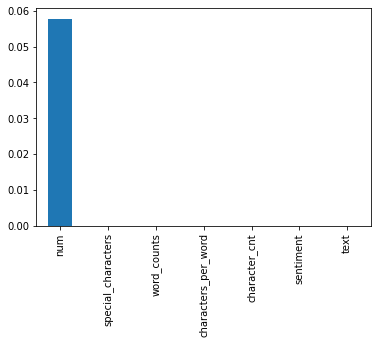

In [34]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

p_values.plot.bar()